## Name: Attulya Pratap Gupta

## Section: 003

## Date: 04/23/2023

#                                    __Formula-1 1950-2023 Data Analysis__

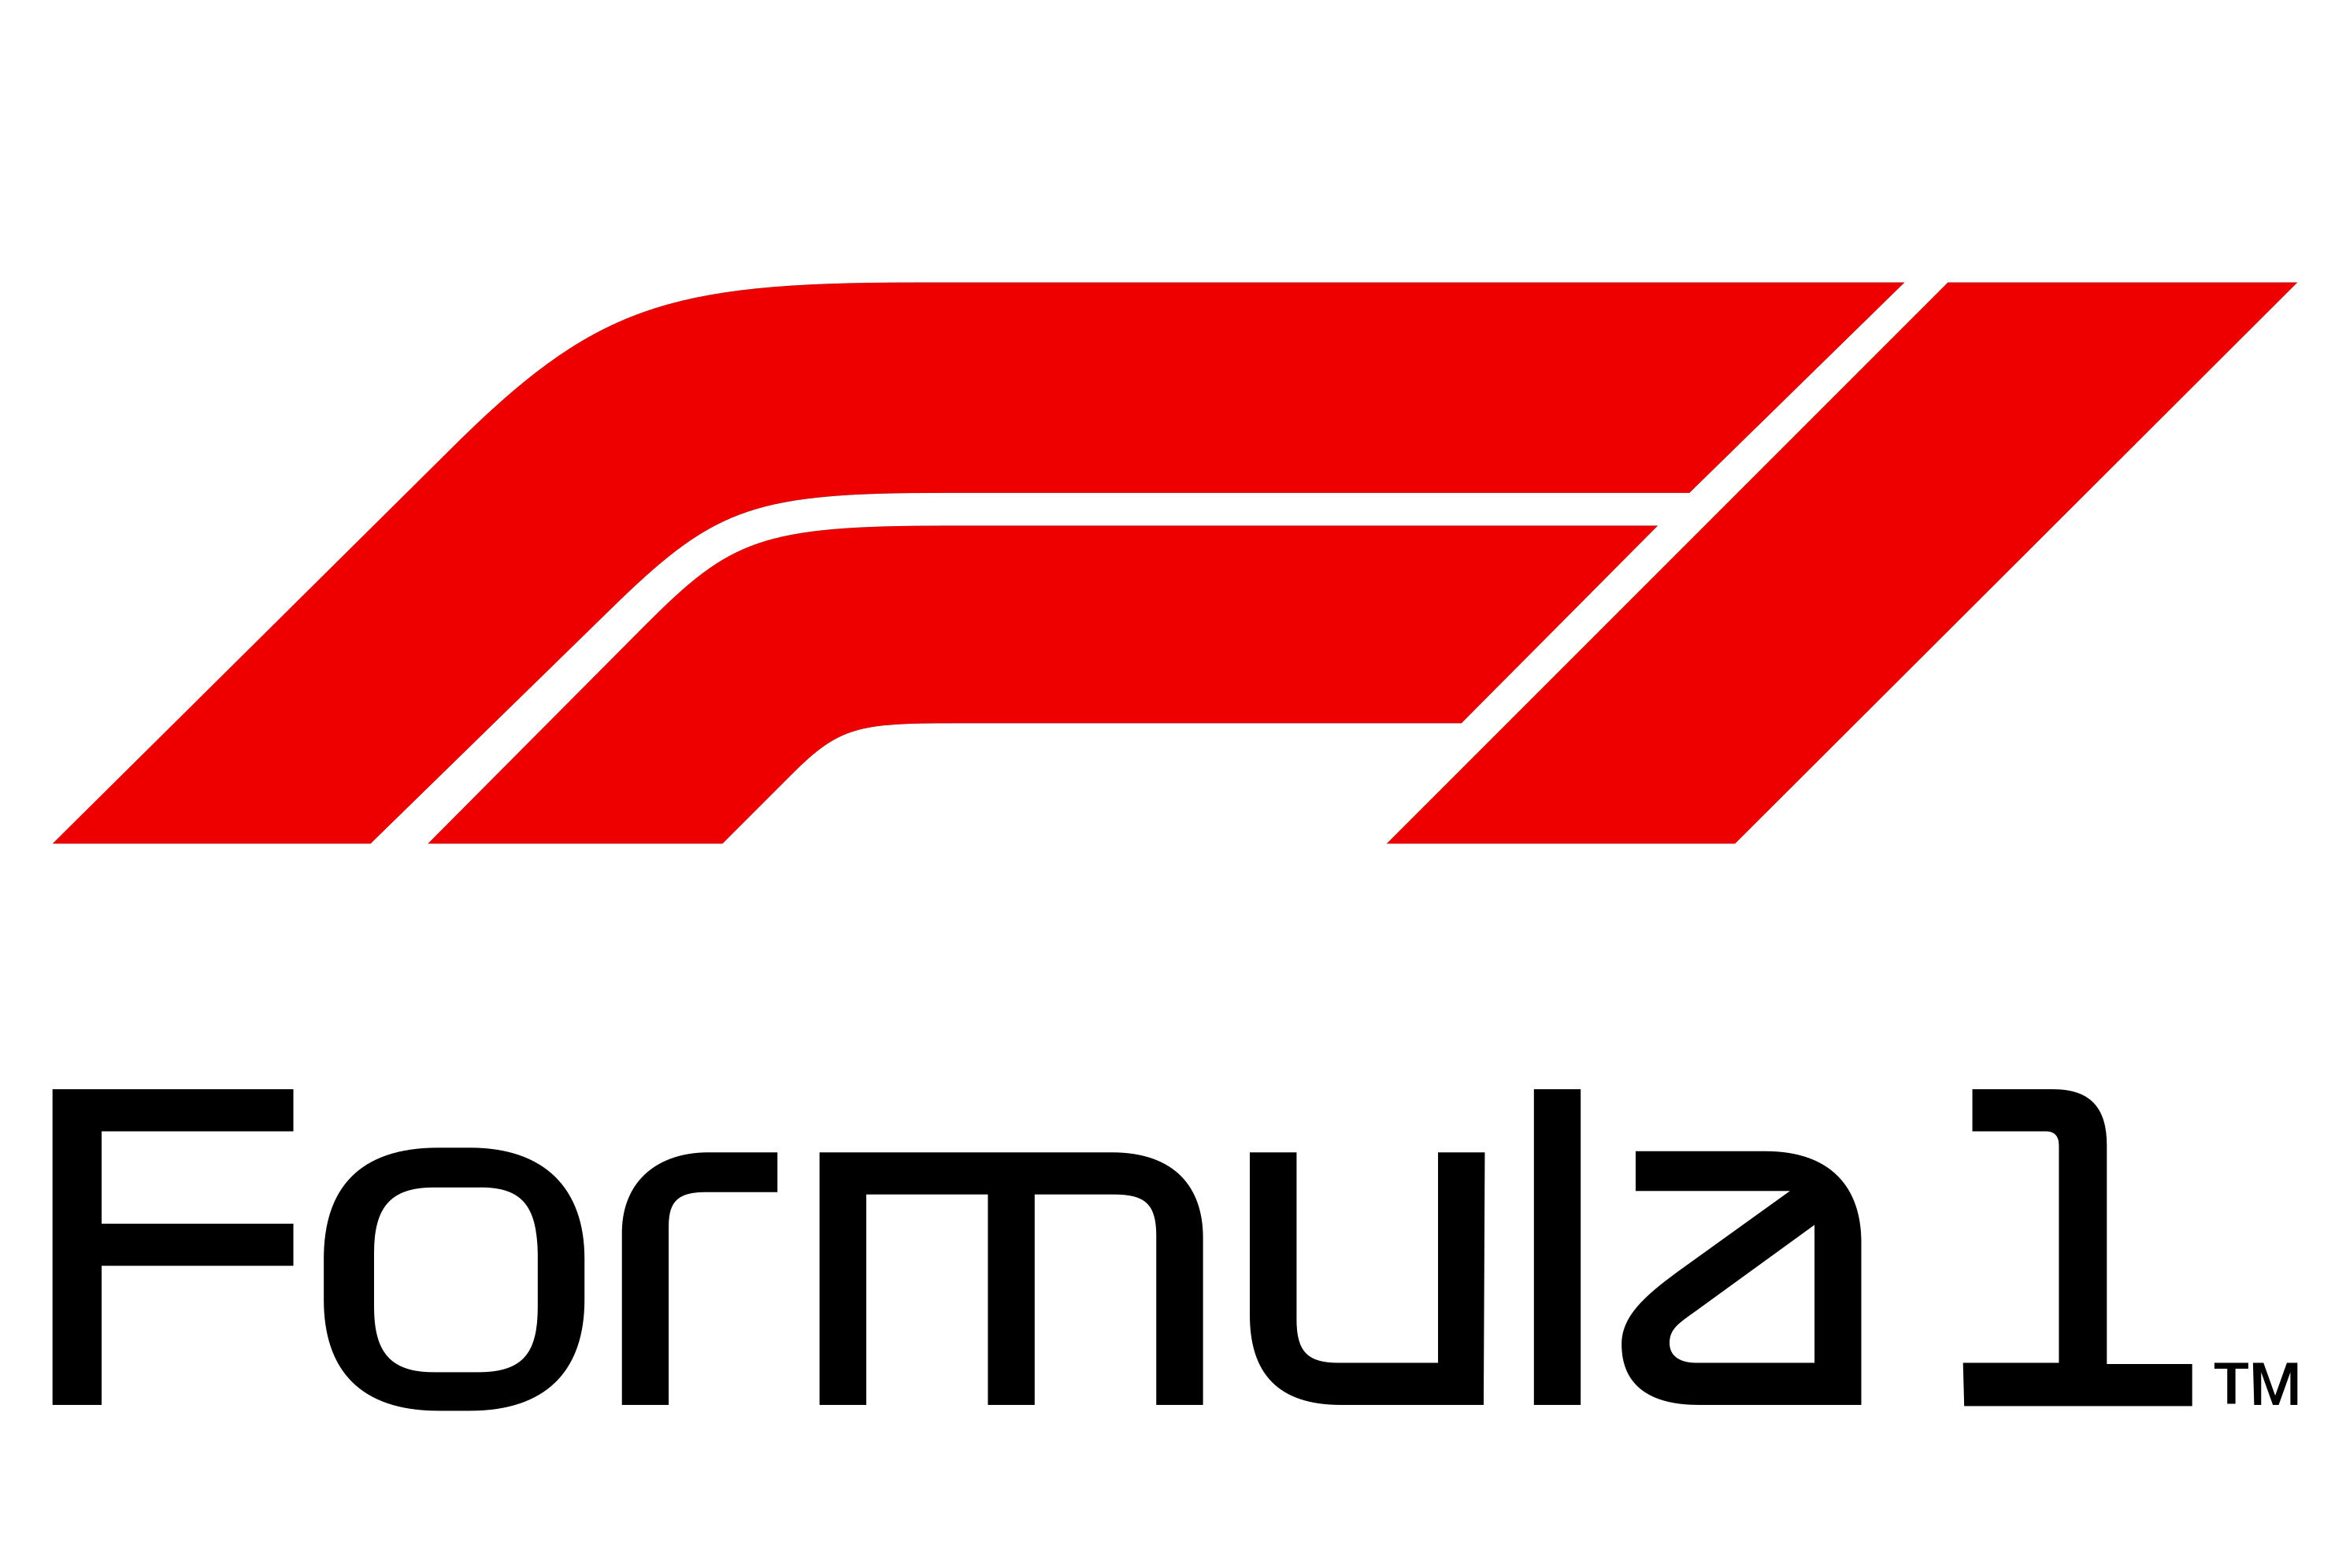

## Background and Motivation

F1 is much more than just a race. It's a complex ecosystem of technology, engineering, and strategy, where every detail matters. From the design of the cars to the way the drivers approach each corner, every aspect of the sport is finely tuned to give teams the best possible chance of success.

How much does the starting position in a Formula 1 race affect a driver's chances of winning? It's a critical factor that can make or break a driver's chances, but it's not always clear just how much of an impact it has on the final results. That's why we need to investigate this important question and uncover the insights that can help drivers, teams, and fans better understand the sport.

To answer this question, we'll be digging deep into the historical data of F1 races, analyzing race results, and examining how qualifying position correlates with the final outcome. Moreover, this research will also provide valuable insights to F1 fans, helping them better understand the sport, and enhancing their viewing experience.

Overall, this investigation is an exciting and important research area that will shed light on the complex relationship between qualifying position and race results in F1.

## Research Questions

1. __Exploring the relationship between Starting Grid position and the Final race position__
2. __Identifying the most dangerous track in Formula 1 racing__
3. __Identifying the driver who lead most laps in F-1__
4. __Identifying the fastest lap time recorded for each track and who set the fastest time__
5. __Analyzing the difference between the lap times from the Early Era and the Hybrid Era__

## METHODOLOGY

The methodology used to conduct this analysis included combining the scattered data in different csv files into a coherent dataframe. The task involved:
* Loading all the available csv files into the Jupyter notebook. 
* Filtering and Formatiing all the sub-dataframes available. 
* Displaying the header for each sub-dataframe to get an idea of the dataset
* Creating a final dataframe to work on by merging the sub-dataframes
* Removing the redundant values in the datafrmae and dropping unnecessary columns
* Dropping Na values 
* Sorting the dataframe and changing the datatype of required columns according to the need
* Data Visualization to draw conclusions

## __Importing Relevant Packages__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib inline

## __Loading Necessary CSV Files__

In [3]:
driver_data = pd.read_csv("drivers.csv")
driver_standings = pd.read_csv("driver_standings.csv")
circuits_data = pd.read_csv("circuits.csv")
lap_times = pd.read_csv("lap_times.csv")
cons_results = pd.read_csv("constructor_results.csv")
cons_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
pit_stops = pd.read_csv('pit_stops.csv')
quali = pd.read_csv('qualifying.csv')
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
status = pd.read_csv("status.csv")

## __Refining and Displaying the Header of Each Dataframe__

In [4]:
#Refining the Driver Details Dataframe
name =  driver_data['forename']+" " + driver_data['surname']
driver_data.drop(columns = ['number', 'dob','url','forename', 'surname'], inplace = True)
driver_data['driver_name'] = name

In [5]:
#Display the header of the DataFrame
driver_data.head()

,driverId,driverRef,code,nationality,driver_name
0,1,hamilton,HAM,British,Lewis Hamilton
1,2,heidfeld,HEI,German,Nick Heidfeld
2,3,rosberg,ROS,German,Nico Rosberg
3,4,alonso,ALO,Spanish,Fernando Alonso
4,5,kovalainen,KOV,Finnish,Heikki Kovalainen


In [6]:
#Display the header of the Driver Standing DataFrame
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [7]:
#Refining individual data frame and Displaying the header
circuits_data.drop(columns=['url'], axis = 1 , inplace = True)
circuits_data.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [8]:
#Displaying the header
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [9]:
#Refining individual data frame and Displaying the header
cons_results.rename({'points': 'cons_points'}, axis = 1, inplace= True)
cons_results.head()

,constructorResultsId,raceId,constructorId,cons_points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [10]:
#Displaying the header
cons_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [11]:
#Refining individual data frame and Displaying the header
constructors.drop(columns = ['url'], axis = 1, inplace = True)
constructors.rename({"name": "cons_name", "nationality": "cons_nation"}, axis = 1, inplace =True)
constructors.head()

,constructorId,constructorRef,cons_name,cons_nation
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [12]:
#Displaying the header
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [13]:
#Refining individual data frame and Displaying the header
quali.rename(columns = { 'position': 'quali_pos'}, inplace = True)
quali.head()

,qualifyId,raceId,driverId,constructorId,number,quali_pos,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [14]:
#Refining individual data frame and Displaying the header
races.drop(columns = ['url','fp1_date','fp1_time' ,'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date','quali_time', 'sprint_date','sprint_time'], axis = 1, inplace = True)
races.head()

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


In [15]:
#Displaying the header
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [16]:
#Displaying the header
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


## Data Filtering

__MERGING THE DATASETS__

In [17]:
#Merging the dataframes to reach a final dataframe used for visualizations
final_df = pd.merge(results, races[['raceId','year','name','round']], on = 'raceId', how = 'left')
#Dropping repetitive and redundant columns
final_df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'rank'], axis = 1, inplace = True)
#Merging more columns
final_df = pd.merge(final_df,driver_data[['driverId', 'driver_name', 'nationality', 'driverRef']], on='driverId', how = 'left')
final_df = pd.merge(final_df, constructors[['constructorId', 'cons_name', 'cons_nation']], on = 'constructorId', how = 'left')

__REMOVING THE INCOMPLETE DATASET__

In [18]:
#THe 2019 dataset has missing data so it is not considered in this analysis
final_df = final_df[final_df['year']!=2019]

__SORTING THE VALUES__

In [19]:
#Sorting the dataset in the following order
# The most recent year -> Increasing order of round for a race -> Increasing order of Position
final_df = final_df.sort_values(by = ['year', 'round', 'positionOrder'], ascending = [False, True, True])

__REPLACING THE NON READABLE VALUES IN SOME COLUMNS BY Nan__

In [20]:
#Replacing unprocessable values by np.nan so that it can de dropped or processed later
final_df['time'].replace('\\N',np.nan, inplace = True)
final_df['milliseconds'].replace('\\N',np.nan, inplace = True)
final_df['fastestLapTime'].replace('\\N',np.nan, inplace = True)
final_df['fastestLapSpeed'].replace('\\N',np.nan, inplace = True)

__Changing Datatype and Dropping index column__

In [21]:
#Converting required columns to Datatype of choice to conduct analysis
final_df.fastestLapSpeed = final_df.fastestLapSpeed.astype(float)
final_df.milliseconds = final_df.milliseconds.astype(float)
final_df.reset_index(drop = True, inplace = True)

__DISPLAYING THE CURRENT DATAFRAME__

In [23]:
final_df.to_csv("Final_dataframe.csv")
final_df

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,year,name,round,driver_name,nationality,driverRef,cons_name,cons_nation
0,25406,1074,844,6,1,1,26.0,1:37:33.584,5853584.0,1:34.570,206.018,1,2022,Bahrain Grand Prix,1,Charles Leclerc,Monegasque,leclerc,Ferrari,Italian
1,25407,1074,832,6,3,2,18.0,+5.598,5859182.0,1:35.740,203.501,1,2022,Bahrain Grand Prix,1,Carlos Sainz,Spanish,sainz,Ferrari,Italian
2,25408,1074,1,131,5,3,15.0,+9.675,5863259.0,1:36.228,202.469,1,2022,Bahrain Grand Prix,1,Lewis Hamilton,British,hamilton,Mercedes,German
3,25409,1074,847,131,9,4,12.0,+11.211,5864795.0,1:36.302,202.313,1,2022,Bahrain Grand Prix,1,George Russell,British,russell,Mercedes,German
4,25410,1074,825,210,7,5,10.0,+14.754,5868338.0,1:36.623,201.641,1,2022,Bahrain Grand Prix,1,Kevin Magnussen,Danish,kevin_magnussen,Haas F1 Team,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25415,20172,839,763,51,4,23,0.0,NaN,NaN,NaN,NaN,5,1950,Italian Grand Prix,7,Consalvo Sanesi,Italian,sanesi,Alfa Romeo,Swiss
25416,20173,839,626,141,10,24,0.0,NaN,NaN,NaN,NaN,7,1950,Italian Grand Prix,7,Robert Manzon,French,manzon,Simca,French
25417,20174,839,669,105,15,25,0.0,NaN,NaN,NaN,NaN,5,1950,Italian Grand Prix,7,Prince Bira,Thai,bira,Maserati,Italian
25418,20175,839,756,105,27,26,0.0,NaN,NaN,NaN,NaN,5,1950,Italian Grand Prix,7,Paul Pietsch,German,pietsch,Maserati,Italian


## Data Visualization

### Research Question1:  Finding the Impact of Qualifying Results on Final Race Results

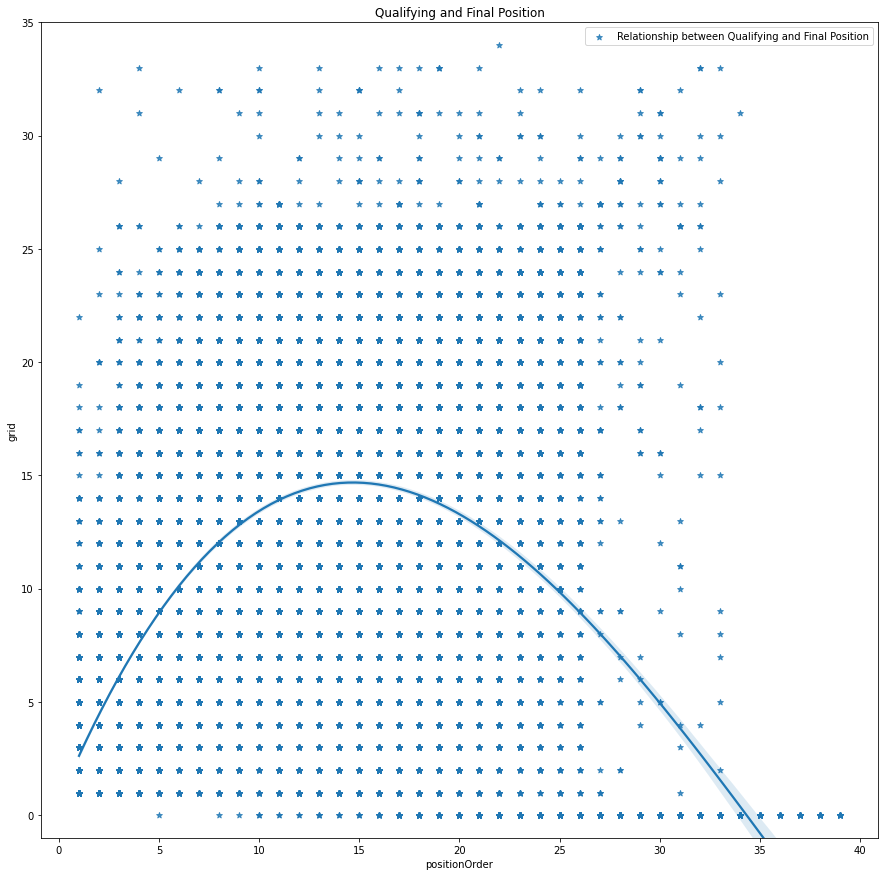

In [24]:
#Setting the figure size
plt.figure(figsize = (15,15))
#Setting the color palette
sns.set_color_codes(palette = 'pastel')
#Making a 3rd order regression plot to map relationship
sns.regplot(x = 'positionOrder', y = 'grid', data = final_df, order = 3,marker = '*', label = 'Relationship between Qualifying and Final Position')
#Displaying the legend
plt.legend()
#Setting y axis limits
plt.ylim(-1,35)
#Displaying title
plt.title('Qualifying and Final Position')
plt.savefig("RQ1")

### Research Question 2: Identifying the most dangerous tracks in Formula 1 racing 

__Considered the following parameters:__
1. Accidents (Status 3)
2. Collisions (Status 4)
3. Spinning Off(Status 20)

In [25]:
#Creating a sub-dataframe containing records of only accidents, collisons and spiining off
accident_data = final_df[(final_df.statusId==3) | (final_df.statusId==4) | (final_df.statusId==20)]
accident_data.head()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastestLapTime,fastestLapSpeed,statusId,year,name,round,driver_name,nationality,driverRef,cons_name,cons_nation
37,25443,1075,849,3,18,18,0.0,NaN,NaN,1:37.530,227.892,3,2022,Saudi Arabian Grand Prix,2,Nicholas Latifi,Canadian,latifi,Williams,British
58,25464,1076,20,117,17,19,0.0,NaN,NaN,1:25.189,223.042,3,2022,Australian Grand Prix,3,Sebastian Vettel,German,vettel,Aston Martin,British
59,25465,1076,832,6,9,20,0.0,NaN,NaN,NaN,NaN,20,2022,Australian Grand Prix,3,Carlos Sainz,Spanish,sainz,Ferrari,Italian
79,25485,1077,832,6,4,20,0.0,NaN,NaN,NaN,NaN,4,2022,Emilia Romagna Grand Prix,4,Carlos Sainz,Spanish,sainz,Ferrari,Italian
96,25502,1078,20,117,0,17,0.0,NaN,NaN,1:33.479,208.423,4,2022,Miami Grand Prix,5,Sebastian Vettel,German,vettel,Aston Martin,British


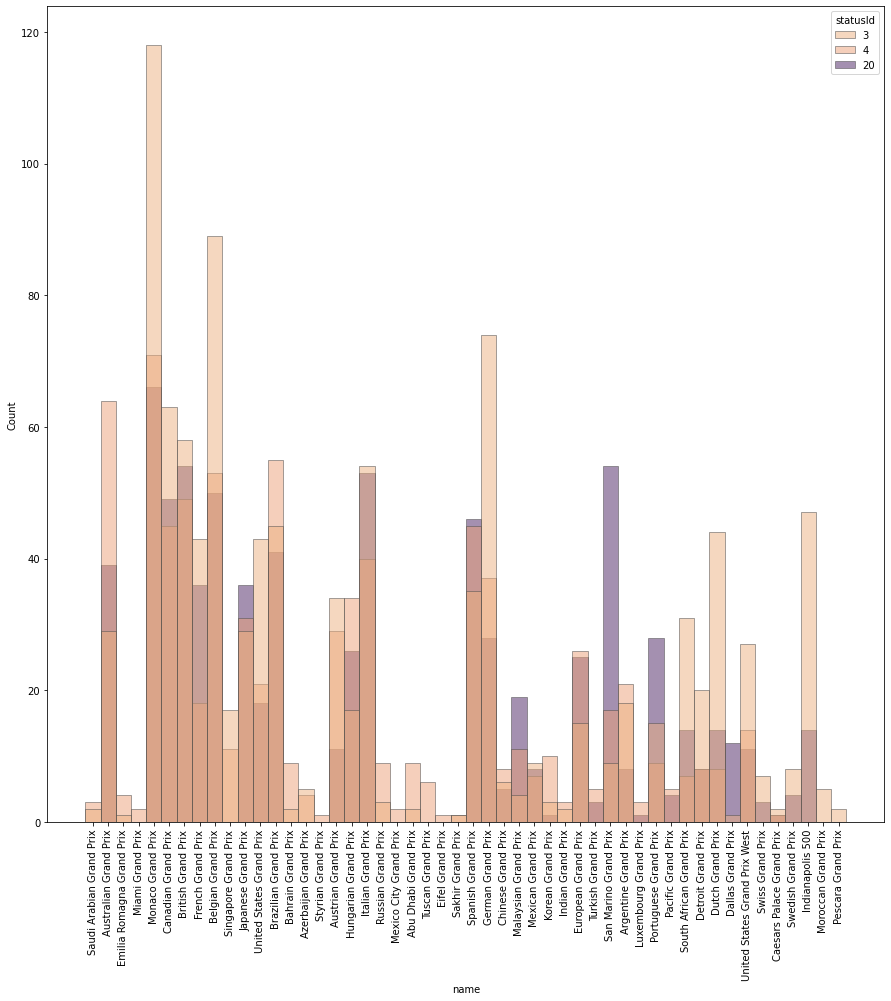

<Figure size 432x288 with 0 Axes>

In [26]:
#Plotting the Data using seaborn histplot
plt.figure(figsize= (15,15))
sns.histplot(accident_data, x="name", hue="statusId",palette="flare",edgecolor=".3",linewidth=.5)
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ2")

### Research Question3:  Identifying the driver who led the most laps in Formula 1 racing

In [27]:
#Creating a sub data frame from lap times and driver data to know the leading driver in each lap
leading_data = pd.merge(lap_times, driver_data[['driverId', 'driver_name']], on = 'driverId', how = 'left')
#Sorting according to the race number and then lap in ascending order
leading_data = leading_data.sort_values(by = ['raceId', 'lap'], ascending = [True, True])
#Covering position to int for analysis
leading_data.position = leading_data.position.astype(int)
leading_data.head()

,raceId,driverId,lap,position,time,milliseconds,driver_name
342881,1,1,1,13,1:49.088,109088,Lewis Hamilton
342939,1,13,1,3,1:40.201,100201,Felipe Massa
342984,1,8,1,5,1:41.712,101712,Kimi Räikkönen
343039,1,9,1,4,1:41.250,101250,Robert Kubica
343094,1,2,1,17,2:37.754,157754,Nick Heidfeld


In [28]:
leading_data = leading_data[leading_data.position==1]
leading_data.head()

,raceId,driverId,lap,position,time,milliseconds,driver_name
343770,1,18,1,1,1:35.652,95652,Jenson Button
343771,1,18,2,1,1:30.612,90612,Jenson Button
343772,1,18,3,1,1:29.848,89848,Jenson Button
343773,1,18,4,1,1:29.223,89223,Jenson Button
343774,1,18,5,1,1:28.787,88787,Jenson Button


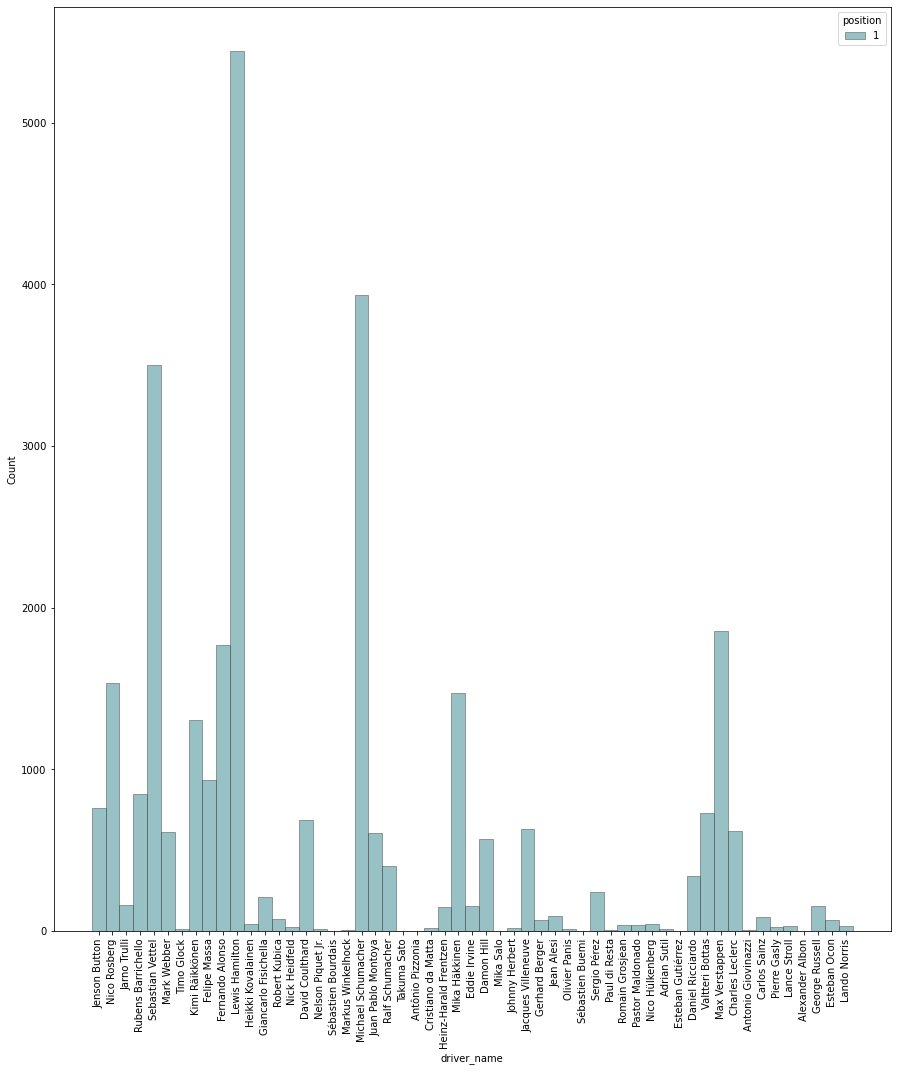

<Figure size 432x288 with 0 Axes>

In [29]:
#Plotting the figure usinh seaborn histplot
plt.figure(figsize= (15,17))
sns.histplot(leading_data, x="driver_name", hue="position",palette="crest",edgecolor=".3",linewidth=.5)
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ3")

In [30]:
#Counting the number of laps led by each driver
count_of_laps = leading_data['driver_name'].value_counts()
#Printing the details
print(count_of_laps)

Lewis Hamilton           5443
Michael Schumacher       3937
Sebastian Vettel         3501
Max Verstappen           1855
Fernando Alonso          1770
Nico Rosberg             1533
Mika Häkkinen            1474
Kimi Räikkönen           1305
Felipe Massa              937
Rubens Barrichello        850
Jenson Button             762
Valtteri Bottas           728
David Coulthard           690
Jacques Villeneuve        633
Charles Leclerc           617
Mark Webber               611
Juan Pablo Montoya        605
Damon Hill                569
Ralf Schumacher           401
Daniel Ricciardo          340
Sergio Pérez              242
Giancarlo Fisichella      214
Jarno Trulli              163
George Russell            158
Eddie Irvine              157
Heinz-Harald Frentzen     150
Jean Alesi                 92
Carlos Sainz               89
Robert Kubica              74
Gerhard Berger             72
Esteban Ocon               66
Nico Hülkenberg            43
Heikki Kovalainen          42
Romain Gro

### Research Question4:  Identifying the Fastest Lap Record for each track and the Driver who set it

In [37]:
#Making a sub dataframe to better understand the data 
fast_lap_data = pd.merge(lap_times, driver_data[['driverId', 'driver_name']], on = 'driverId', how = 'left')
fast_lap_data = pd.merge(fast_lap_data, races[['raceId', 'name']], on = 'raceId', how = 'left')
#Sorting the values
fast_lap_data = fast_lap_data.sort_values(by = ['raceId', 'lap'], ascending = [True, True])
fast_lap_data.milliseconds = fast_lap_data.milliseconds.astype(int)
#Dropping the na values
fast_lap_data.dropna(axis=1)


,raceId,driverId,lap,position,time,milliseconds,driver_name,name
342881,1,1,1,13,1:49.088,109088,Lewis Hamilton,Australian Grand Prix
342939,1,13,1,3,1:40.201,100201,Felipe Massa,Australian Grand Prix
342984,1,8,1,5,1:41.712,101712,Kimi Räikkönen,Australian Grand Prix
343039,1,9,1,4,1:41.250,101250,Robert Kubica,Australian Grand Prix
343094,1,2,1,17,2:37.754,157754,Nick Heidfeld,Australian Grand Prix
...,...,...,...,...,...,...,...,...
537464,1096,839,58,7,1:30.021,90021,Esteban Ocon,Abu Dhabi Grand Prix
537522,1096,20,58,10,1:30.351,90351,Sebastian Vettel,Abu Dhabi Grand Prix
537607,1096,852,58,11,1:32.280,92280,Yuki Tsunoda,Abu Dhabi Grand Prix
537665,1096,840,58,8,1:31.330,91330,Lance Stroll,Abu Dhabi Grand Prix


In [32]:
#Function to format milliseconds into required minutes:seconds.milliseconds format
def convert(millisec):
    seconds = int((millisec/1000)%60)
    minutes = int((millisec/(1000*60))%60)
    milliseconds = int(millisec%1000)
    return '{:01d}:{:02d}.{:03d}'.format(minutes,seconds,milliseconds)

In [33]:
#Findinf all the unique tracks
different_tracks = fast_lap_data['name'].unique()
fastest_dict = dict()
#For each track finding the lowest milliseconds
for track_name in different_tracks:
    it_data = fast_lap_data[fast_lap_data['name']==track_name]
    times_recorded = it_data['milliseconds']
    #Finding fastest lap using lowest milliseconds
    fastest_time_rec = min(times_recorded)
    driver_named = it_data[it_data['milliseconds']==fastest_time_rec]['driver_name']
    #Adding fastest time and driver name to dictionary
    fastest_dict[track_name] = (convert(fastest_time_rec),driver_named)

#Creating a list to store times and respective driver names
time_list = []
rec_driver_list = []

for key,tup in fastest_dict.items():
    time_list.append(tup[0])
    rec_driver_list.append(str(tup[1]))


In [34]:
#Clearing unnecessary values from driver name
new_rec_driv = []
for value in rec_driver_list:
    ind = value.find("\n")
    s = value[:ind]
    ind2 = s.find(next(filter(str.isalpha, s)))
    new_rec_driv.append(s[ind2:])

### Printing the Track, Record Time and Driver Name

In [35]:
print_data = pd.DataFrame()
print_data['Track'] = different_tracks
print_data['Record'] = time_list
print_data['Driver Name'] = new_rec_driv
print_data.to_csv("Record.csv")
print_data

,Track,Record,Driver Name
0,Australian Grand Prix,1:20.260,Charles Leclerc
1,Malaysian Grand Prix,1:34.080,Sebastian Vettel
2,Chinese Grand Prix,1:32.238,Michael Schumacher
3,Bahrain Grand Prix,1:30.252,Michael Schumacher
4,Spanish Grand Prix,1:15.641,Giancarlo Fisichella
5,Monaco Grand Prix,1:12.909,Lewis Hamilton
6,Turkish Grand Prix,1:24.770,Juan Pablo Montoya
7,British Grand Prix,1:18.739,Michael Schumacher
8,German Grand Prix,1:13.780,Kimi Räikkönen
9,Hungarian Grand Prix,1:16.207,Michael Schumacher


## Research Question5: __Analyzing the difference between the lap times from the Early Era and the Hybrid Era__

## Eras of Formula 1 racing

Formula 1 racing has gone through several eras that were defined by technological advancements, regulatory changes, and dominant teams and drivers. The earliest period, known as the Pre-World Championship Era, took place between 1906 and 1949. During this era, motorsport racing was in its infancy, and the races were held on open roads. The cars were large and heavy, and the races were typically long-distance events.

__The Early World Championship Era began in 1950__ when the FIA established the Formula One World Championship. During this era, races took place on dedicated tracks, and teams began to specialize in building race cars. Ferrari emerged as a dominant team during this period, winning seven championships.

__The 1.5 Liter Formula Era started in 1961 and lasted until 1965__. It was characterized by the introduction of a new engine formula, with teams limited to using 1.5-liter engines. British teams like Lotus, Cooper, and Brabham dominated this era with their innovative designs, which introduced rear-engine cars.

__The 3 Liter Formula Era, which lasted from 1966 to 1983__, saw the replacement of the 1.5-liter engine formula with a 3-liter formula. During this era, the use of aerodynamics in car design became more prominent, and Ford-Cosworth engines became the standard power source for most teams.

__The Turbo Era, which lasted from 1984 to 1988__, saw the popularity of turbocharged engines that allowed teams to achieve higher horsepower and speed. This era was marked by intense rivalry between McLaren and Ferrari.

__The Naturally-Aspirated Era began in 1989 and lasted until 1993__, with the banning of turbocharged engines and the reintroduction of naturally-aspirated engines. During this period, active suspension systems were introduced, which improved handling and lap times.

__The Schumacher Era, which lasted from 1994 to 2004__, was characterized by the dominance of Michael Schumacher and his Ferrari team, who won seven World Championships. During this period, car design continued to emphasize aerodynamics, and new safety measures, such as the HANS device, were introduced.

__The V8 Era began in 2005 and lasted until 2013__. It saw the use of V8 engines replacing the V10s. During this period, teams like Ferrari, McLaren, and Red Bull Racing emerged as dominant forces.

__Finally, the Hybrid Era began in 2014 with the introduction of the hybrid power unit__, which consists of a V6 engine and electric motors. This era has been characterized by the dominance of Mercedes-AMG Petronas Formula One Team, which has won the championship every year since 2014 to 2020. The hybrid power unit has made the cars faster and more energy-efficient, and it is expected to continue to be the standard for the foreseeable future.

## Classifying Dominance by a Team

* Number of Podium finishes ( 1st, 2nd or 3rd)
* Number of World Constructor Championships Won


## Considering the Early World Championship Era (1950-1960)

In [412]:
#Converting year to int so that comparison operartions can be held
final_df.year = final_df.year.astype(int)
final_df.points = final_df.points.astype(float)
#Filtering the data for the required era
early_era = final_df[final_df['year']<=1965]

In [413]:
#Filtering all the podium finish
early_era = early_era[(early_era['positionOrder']==1) | (early_era['positionOrder']==2) | (early_era['positionOrder']==3)]
#Identifying the number of posium finishes by each constructor
unique_cons = pd.DataFrame(early_era['cons_name'].value_counts())
cons_scores = pd.DataFrame(early_era.groupby('cons_name')['points'].sum())

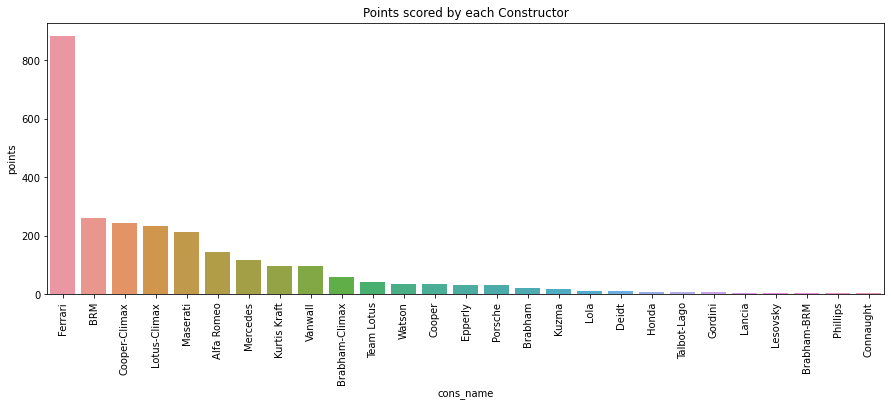

<Figure size 432x288 with 0 Axes>

In [415]:
#Sorting in Descending order of points scored
cons_scores = cons_scores.sort_values('points', ascending = False)
#Plotting the figure
plt.figure(figsize= (15,5))
#Using a seaborn barplot
sns.barplot(x=cons_scores.index, y = 'points',data = cons_scores)
plt.title('Points scored by each Constructor')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ5i")

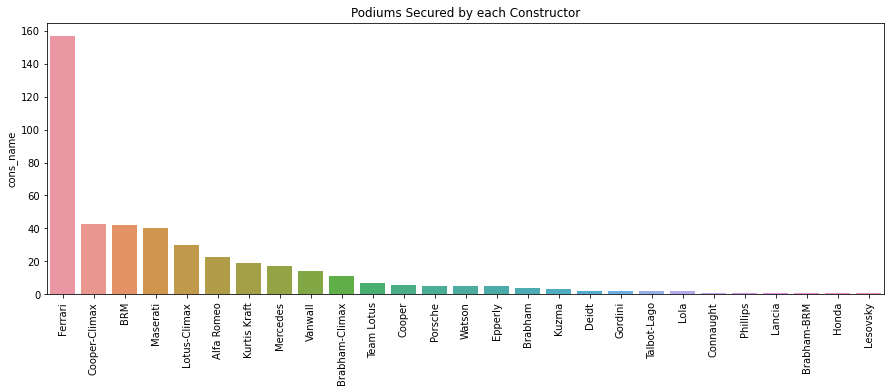

<Figure size 432x288 with 0 Axes>

In [416]:
#Plottingthe Podiums Secured by each constructor
plt.figure(figsize= (15,5))
sns.barplot(x=unique_cons.index, y = 'cons_name',data = unique_cons)
plt.title('Podiums Secured by each Constructor')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ5j")

## Considering the Hybrid Era (2014-Current)

In [401]:
hybrid_era = final_df[final_df['year']>=2014]
#Filtering all the podium finish
hybrid_era = hybrid_era[(hybrid_era['positionOrder']==1) | (hybrid_era['positionOrder']==2) | (hybrid_era['positionOrder']==3)]
#Identifying the number of posium finishes by each constructor
unique_cons1 = pd.DataFrame(hybrid_era['cons_name'].value_counts())
cons_scores1 = pd.DataFrame(hybrid_era.groupby('cons_name')['points'].sum())

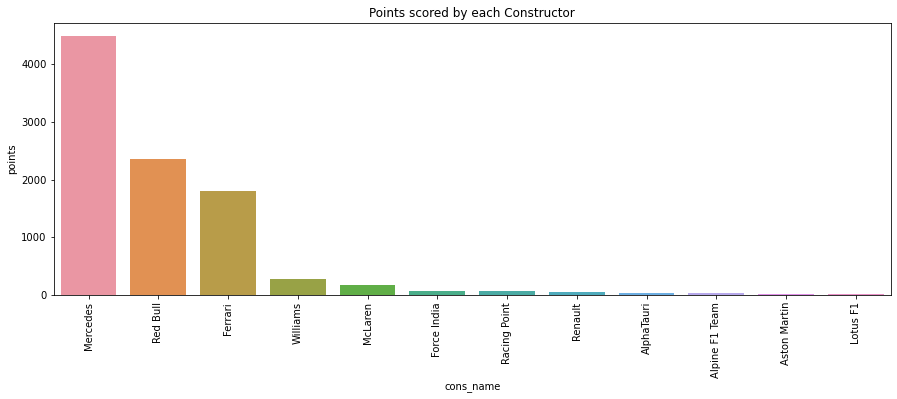

<Figure size 432x288 with 0 Axes>

In [421]:
#Fetching the cosn scores and soprting them 
cons_scores1 = cons_scores1.sort_values('points', ascending = False)
plt.figure(figsize= (15,5))
#Using a barplot to visualize
sns.barplot(x=cons_scores1.index, y = 'points',data = cons_scores1)
plt.title('Points scored by each Constructor')
#Rotating the labels in the x-axis horizontally
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ5k")

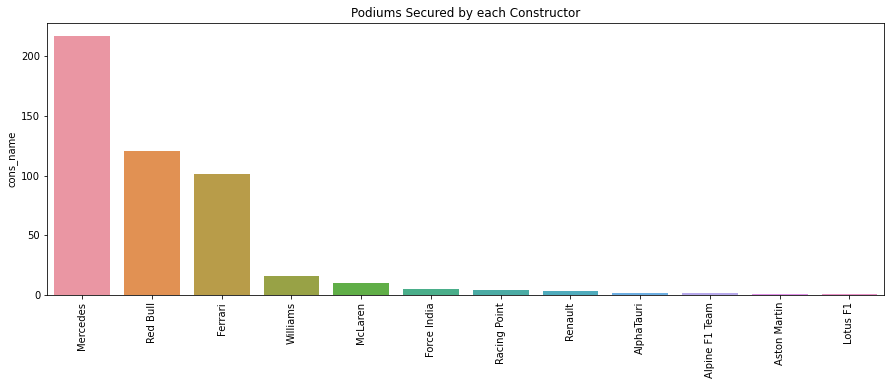

<Figure size 432x288 with 0 Axes>

In [418]:
plt.figure(figsize= (15,5))
sns.barplot(x=unique_cons1.index, y = 'cons_name',data = unique_cons1)
plt.title('Podiums Secured by each Constructor')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ5l")

## Identifying the difference between Lap times between the Early Era and the Hybrid Era

In [405]:
#For the early era, the following code fetches the fastest time and the repsective driver for each track

early_era_tracks = early_era['name'].unique()
fastest_ee = dict()

for track in early_era_tracks:
    it_data = early_era[early_era['name']==track]
    fastest_lap = min(it_data['milliseconds'])
    fastest_driver = it_data[it_data['milliseconds']==fastest_lap]['driver_name']
    fastest_ee[track] = (fastest_lap,fastest_driver)
    
early_era_time = []
early_era_driver = []

for track,details in fastest_ee.items():
    early_era_time.append(int(details[0]))
    #Filtering the name to remove unnnecesary part of the string
    driver = str(details[1])
    ind = driver.find("\n")
    driver = driver[:ind]
    ind2 = driver.find(next(filter(str.isalpha, driver)))
    early_era_driver.append(driver[ind2:])


In [406]:
#For the hybrid era, the following code fetches the fastest time and the repsective driver for each track
hybrid_era_tracks = hybrid_era['name'].unique()
fastest_he = dict()

for track in hybrid_era_tracks:
    it_data = hybrid_era[hybrid_era['name']==track]
    fastest_lap = min(it_data['milliseconds'])
    fastest_driver = it_data[it_data['milliseconds']==fastest_lap]['driver_name']
    fastest_he[track] = (fastest_lap,fastest_driver)
    
hybrid_era_time = []
hybrid_era_driver = []

for track,details in fastest_he.items():
    hybrid_era_time.append(int(details[0]))
    #Filtering the name to remove unnecesary columns
    driver = str(details[1])
    ind = driver.find("\n")
    driver = driver[:ind]
    ind2 = driver.find(next(filter(str.isalpha, driver)))
    hybrid_era_driver.append(driver[ind2:])


In [407]:
#Making the hybrid era data and early era data into separate datafrmaes to merge
h_era = pd.DataFrame({'Track':hybrid_era_tracks,'Hybrid_Drivers': hybrid_era_driver, 'Hybrid_Time': hybrid_era_time})
e_era = pd.DataFrame({'Track':early_era_tracks,'Early_Drivers': early_era_driver, 'Early_Time': early_era_time})

In [408]:
#Merging the dataframes
era_df = pd.merge(e_era,h_era[['Track', 'Hybrid_Drivers', 'Hybrid_Time']], on = 'Track', how = 'left')

In [409]:
#Dropping na values
era_df.dropna(inplace = True)

In [410]:
#Dispalying the dataframe
era_df

,Track,Early_Drivers,Early_Time,Hybrid_Drivers,Hybrid_Time
1,Monaco Grand Prix,Graham Hill,9459600,Max Verstappen,5936820.0
2,Belgian Grand Prix,Tony Brooks,5826300,Max Verstappen,207071.0
3,French Grand Prix,Jack Brabham,7044900,Max Verstappen,5245770.0
4,British Grand Prix,Jack Brabham,7464300,Lewis Hamilton,4887430.0
5,Dutch Grand Prix,Jack Brabham,7307200,Max Verstappen,5405395.0
6,German Grand Prix,Jim Clark,7672400,Lewis Hamilton,5444200.0
7,Italian Grand Prix,Phil Hill,7393000,Lewis Hamilton,4532312.0
8,United States Grand Prix,Jim Clark,7633000,Lewis Hamilton,5630991.0
9,Mexican Grand Prix,Richie Ginther,7712100,Max Verstappen,5786552.0
10,Austrian Grand Prix,Lorenzo Bandini,7578230,Valtteri Bottas,4908523.0


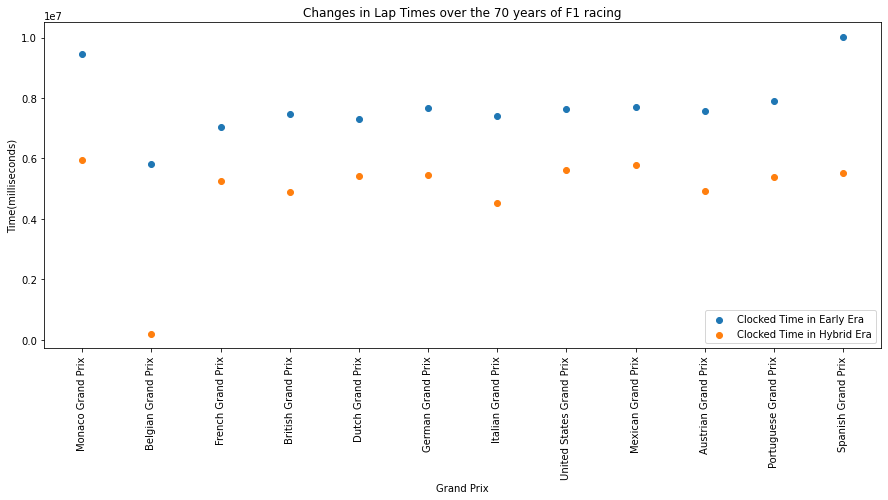

<Figure size 432x288 with 0 Axes>

In [423]:
#Plotting the difference between lap times for the data
plt.figure(figsize= (15,6))
plt.scatter(era_df['Track'], era_df['Early_Time'], label = "Clocked Time in Early Era")
plt.scatter(era_df['Track'], era_df['Hybrid_Time'], label = "Clocked Time in Hybrid Era")
plt.title("Changes in Lap Times over the 70 years of F1 racing")
plt.legend()
plt.xlabel("Grand Prix")
plt.ylabel("Time(milliseconds)")
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ5m")

## Conclusion and Results

__Research Question 1__

Text(0.5, 1.0, 'Qualifying and Final Position')

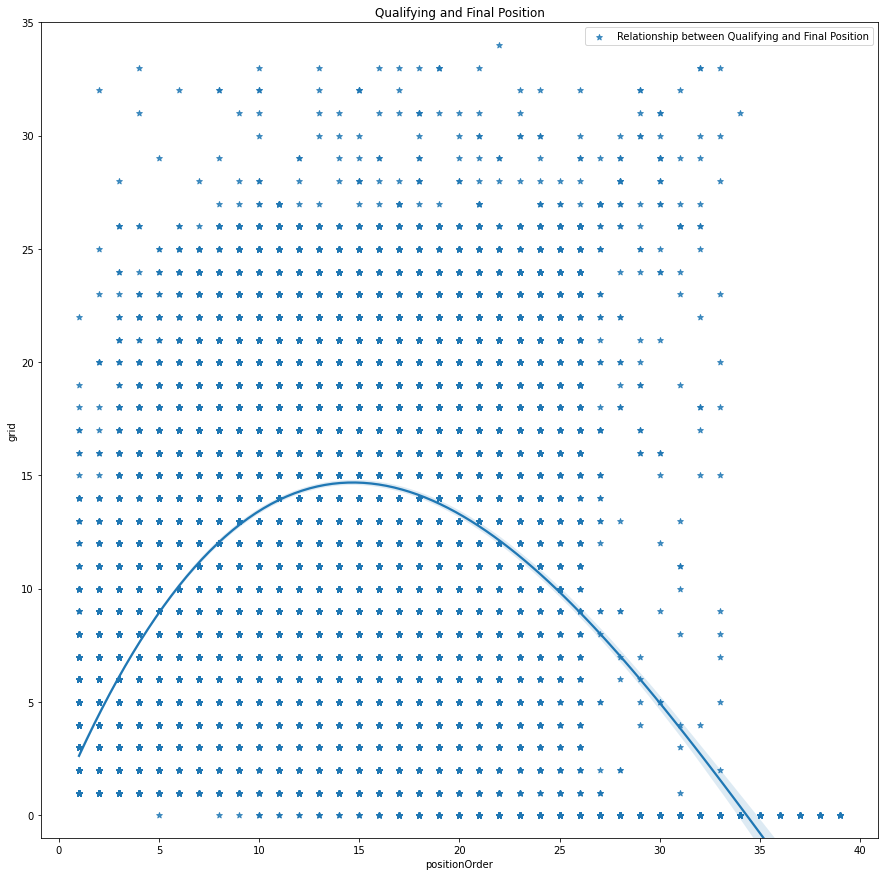

In [422]:
 #Setting the figure size
plt.figure(figsize = (15,15))
#Setting the color palette
sns.set_color_codes(palette = 'pastel')
#Making a 3rd order regression plot to map relationship
sns.regplot(x = 'positionOrder', y = 'grid', data = final_df, order = 3,marker = '*', label = 'Relationship between Qualifying and Final Position')
#Displaying the legend
plt.legend()
#Setting y axis limits
plt.ylim(-1,35)
#Displaying title
plt.title('Qualifying and Final Position')

__CONCLUSIONS DRAWN__
* The above plot maps the relationship between the starting grid position and the final position secured for a Driver in Formula 1 racing.
* The visualization shows us that drivers starting from grid position 1-3 have a very high chnace of securing the first position and if otherwise a podium.
* As the starting grid position increases the possible attainable position also increases for example a person starting at grid position 10 can't generally secure a final position over 6 and will generally finish below the sixth position.
* The following graph thus establishes a high correlation between starting grid position and final position

__Research Question 2__

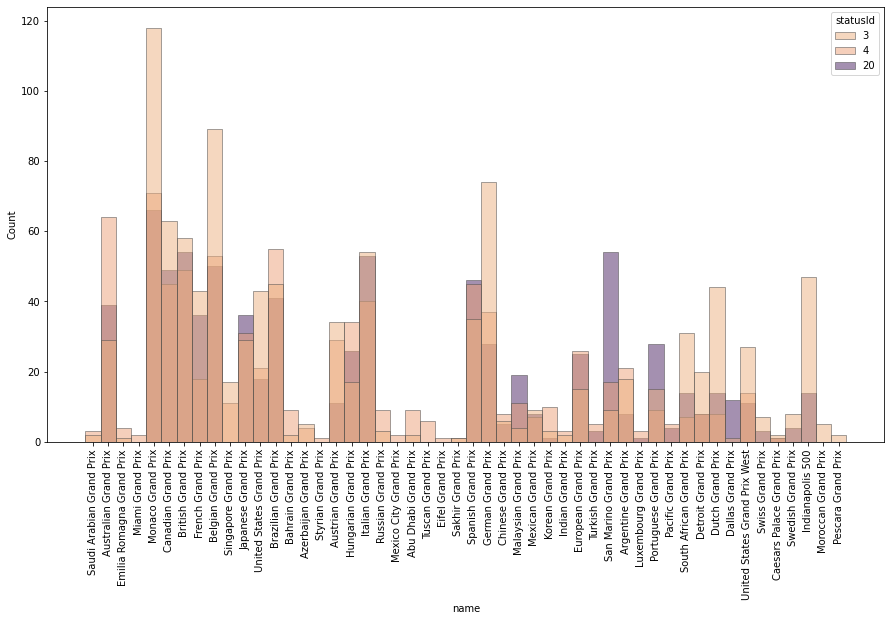

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize= (15,8))
sns.histplot(accident_data, x="name", hue="statusId",palette="flare",edgecolor=".3",linewidth=.5)
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ2")

__CONCLUSIONS DRAWN__
* The most dangerous Formula 1 track is in Monaco and the race is known as the Monaco Grand Prix. The track has had almost 120 incidents of accidents, collisions and drivers spinning off since it's inclusion in the F-1 tracklist.
* The second most dangerous race is the Belgian Grand Prix having almost 90 collisons so far.
* The least dangerous races in Formula 1 are the Eifel Grand Prix, Sakhir Grand Prix and Styrian Grand Prix

__Research Question 3__

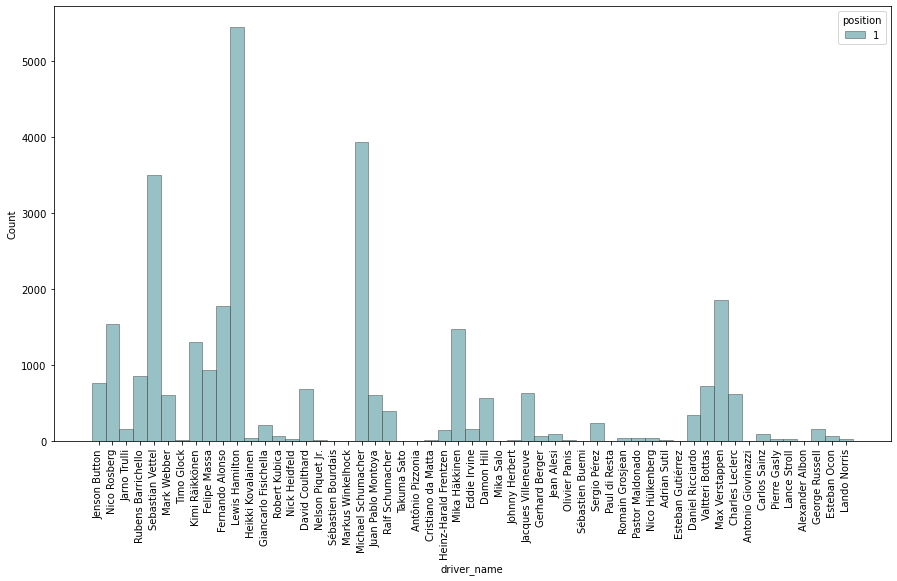

In [30]:
plt.figure(figsize= (15,8))
sns.histplot(leading_data, x="driver_name", hue="position",palette="crest",edgecolor=".3",linewidth=.5)
plt.xticks(rotation = 90)
plt.show()

__CONCLUSIONS DRAWN__
* The driver who is the most successful Formual 1 driver and has led the most laps is Lewis Hamilton with a totla of 5443 followed by Michael Schumacher in second place and Sebastian Vettel in third place.
* The data also shows us that there are some drivers like Sebastian Bourdais, Takuma Sato and Antonio Pizzonia which failed to take the lead in a lap during the duration of their F-1 Career.

__Research_Question 4__

In [427]:
print_data

,Track,Record,Driver Name
0,Australian Grand Prix,1:20.260,Charles Leclerc
1,Malaysian Grand Prix,1:34.080,Sebastian Vettel
2,Chinese Grand Prix,1:32.238,Michael Schumacher
3,Bahrain Grand Prix,1:30.252,Michael Schumacher
4,Spanish Grand Prix,1:15.641,Giancarlo Fisichella
5,Monaco Grand Prix,1:12.909,Lewis Hamilton
6,Turkish Grand Prix,1:24.770,Juan Pablo Montoya
7,British Grand Prix,1:18.739,Michael Schumacher
8,German Grand Prix,1:13.780,Kimi Räikkönen
9,Hungarian Grand Prix,1:16.207,Michael Schumacher


__CONCLUSIONS DRAWN__
* The above data shows us the fastest time clocked for each Grand Prix in Formula 1. 
* Lewis Hamilton is the driver who holds the most record times for Grand Prixs
* The Sakhir Grand Prix is the only grand prix which has a record time set below 1 min
* The Grand Prix with the Highest record time is the Belgian Grand Prix with 1:45.108 minutes

__Research Question 5__

__Early Era__

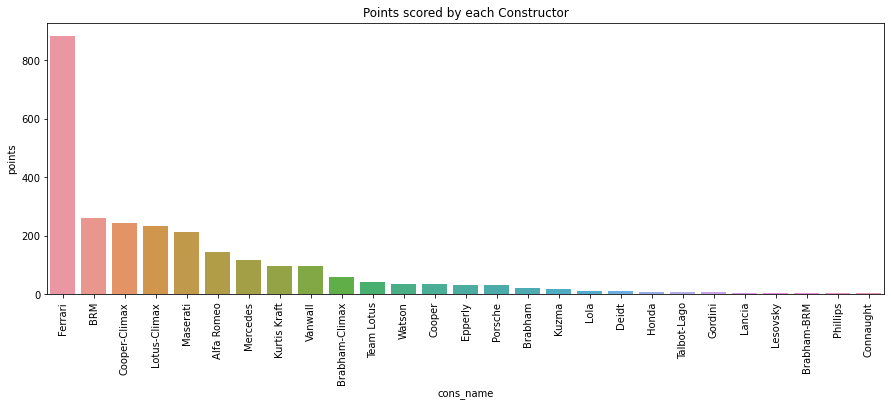

In [429]:
#Plotting the figure
plt.figure(figsize= (15,5))
#Using a seaborn barplot
sns.barplot(x=cons_scores.index, y = 'points',data = cons_scores)
plt.title('Points scored by each Constructor')
plt.xticks(rotation = 90)
plt.show()

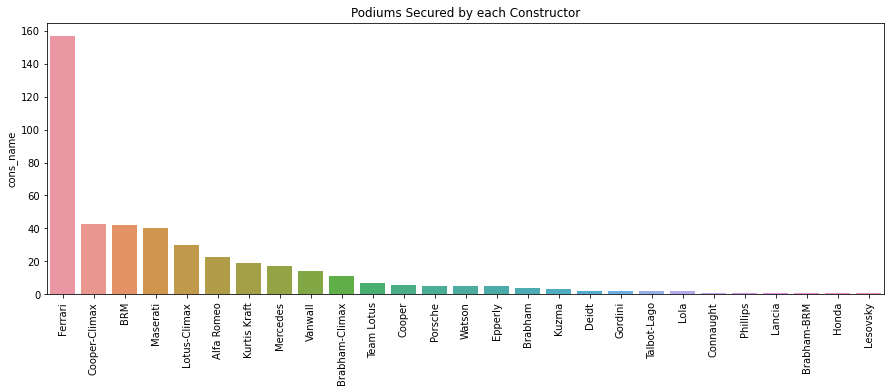

In [430]:
plt.figure(figsize= (15,5))
sns.barplot(x=unique_cons.index, y = 'cons_name',data = unique_cons)
plt.title('Podiums Secured by each Constructor')
plt.xticks(rotation = 90)
plt.show()

__HYBRID ERA__


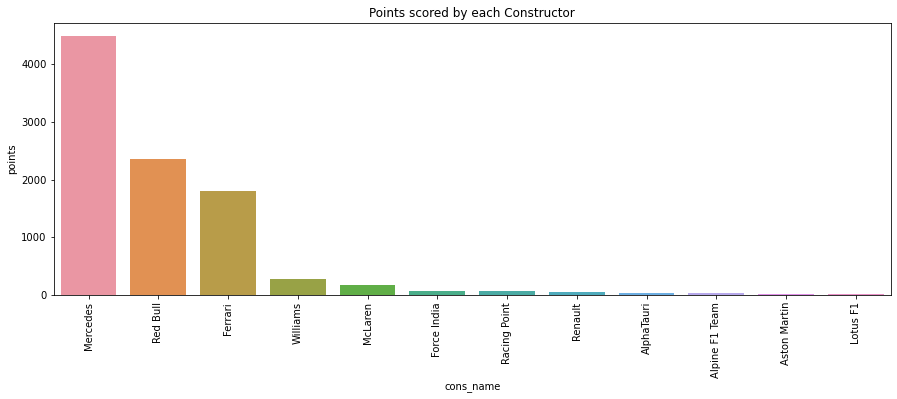

In [431]:
plt.figure(figsize= (15,5))
#Using a barplot to visualize
sns.barplot(x=cons_scores1.index, y = 'points',data = cons_scores1)
plt.title('Points scored by each Constructor')
#Rotating the labels in the x-axis horizontally
plt.xticks(rotation = 90)
plt.show()

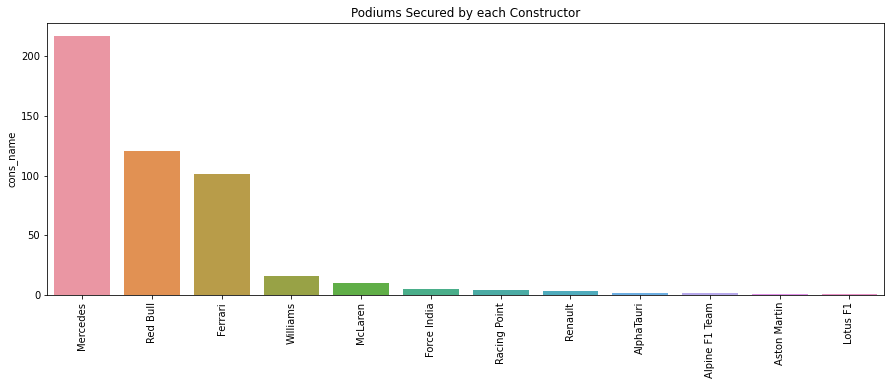

In [432]:
plt.figure(figsize= (15,5))
sns.barplot(x=unique_cons1.index, y = 'cons_name',data = unique_cons1)
plt.title('Podiums Secured by each Constructor')
plt.xticks(rotation = 90)
plt.show()

__CONCLUSIONS DRAWN__
The following graphs give us the following information:
1. Ferrari was the most dominant team in th early era of the sport but the hybrid era is dominated by Mercedes-AMG team
2. The number of teams competing in the hybrid era is far lesser than the number of teams competing in the early era
3. While most of the teams of the old era have stopped competing, Ferrari has remained consistent for the seven decades and has secured the third position in the hybrid era
4. Ferrari secured the most podiums in the Early era whereas Mercedes dominated the hybrid era with more than 200 podiums

__Change in Qualifying time__

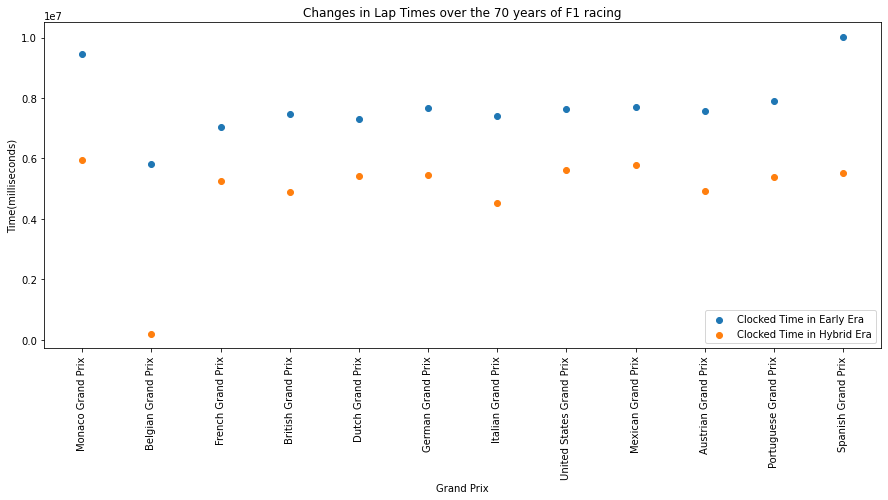

<Figure size 432x288 with 0 Axes>

In [433]:
plt.figure(figsize= (15,6))
plt.scatter(era_df['Track'], era_df['Early_Time'], label = "Clocked Time in Early Era")
plt.scatter(era_df['Track'], era_df['Hybrid_Time'], label = "Clocked Time in Hybrid Era")
plt.title("Changes in Lap Times over the 70 years of F1 racing")
plt.legend()
plt.xlabel("Grand Prix")
plt.ylabel("Time(milliseconds)")
plt.xticks(rotation = 90)
plt.show()
plt.savefig("RQ5m")

__CONCLUSIONS DRAWN__
* The race time has significantly improved since the advent of the sport. The tracks which are still being raced on after 70 years show an increase in speed at an average of 2*10^6 milliseconds. 
* Although the data shows a significantly better time in the hybrid era it is important to consider the changes in lap length regulations.

## Synthesis and Discussion

The process of analysing Formula 1 data was efficient and it helped me draw accurate visualizations about my research question to a certain degree but there are still some things I wish I would have implemented:
1. I wanted to work more with Bayesian models and make a predicting tool for Formula 1
2. Incorporate more new methods from different libraries rather than using the brute power of seaborn
3. Although I used various new panda methods, I wanted to explore the scipy library more in this project.

I faced some initial problems manipulating the merged dataset I created and incorporating the np.nan values that I inserted for missing variables but after changing my approach for some questions I was able to arrive to the best case asnwer
For example: When filtering the data to find the fastest lap for each Grand Prix and the Driver, I was initially going with str column time in which I had to implement substrings to reach an answer but the final answer was not accurate for each grand prix therefore I shifted to the int type milliseconds column and found the fastest lap for each Grand Prix after which I implemented the function to convert milliseconds into the time format.

## Citations

__Dataset Source__ 
https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

__Code Reference used to learn Dataframe management__
https://www.kaggle.com/code/sanketdevhare98/formula-1-data-visualization

__The Official Formula 1 website__ https://www.formula1.com/